In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
kindle_df = pd.read_csv('kindle.csv')
kindle_df['product_review'] = kindle_df['product_review'].str.replace('\n', '')
kindle_df

,review_title,product_review,product_rating,reviewer
0,"Works fine, replaces a Gen 3.",If you own an earlier Paperwhite and it's st...,3.0 out of 5 stars,E. Hinrichsen II
1,Pinhole Bright Spots and Other Issues,"Updated Review on Oct 6, 2019:",4.0 out of 5 stars,Sir Mike
2,Battery life is awful,"I love Kindle, have always had one since the...",3.0 out of 5 stars,Ship210
3,A Review From 2 Perspectives,I feel I need to approach this review from 2...,5.0 out of 5 stars,Rustic
4,It’s waterproof. Everything else is worse.,It’s infuriating that Amazon went to market ...,1.0 out of 5 stars,D. Bier
...,...,...,...,...
9996,My first Kindle - Love it!,"I've never used a Kindle, or any e-reader befo...",5.0 out of 5 stars,AngieF
9997,Amazon con job,"Can no longer ""Remove this title"" from my Kind...",3.0 out of 5 stars,thom flora
9998,A necessary evil...,I bought the Kindle Paperwhite so I could down...,4.0 out of 5 stars,Sylvia
9999,New and imporved,Smaller and lighter (green is the new one and ...,5.0 out of 5 stars,kattface6


In [3]:
kindle_df['product_rating'] = kindle_df.product_rating.apply(lambda r: str(r.split()[0]))
kindle_df

,review_title,product_review,product_rating,reviewer
0,"Works fine, replaces a Gen 3.",If you own an earlier Paperwhite and it's st...,3.0,E. Hinrichsen II
1,Pinhole Bright Spots and Other Issues,"Updated Review on Oct 6, 2019:",4.0,Sir Mike
2,Battery life is awful,"I love Kindle, have always had one since the...",3.0,Ship210
3,A Review From 2 Perspectives,I feel I need to approach this review from 2...,5.0,Rustic
4,It’s waterproof. Everything else is worse.,It’s infuriating that Amazon went to market ...,1.0,D. Bier
...,...,...,...,...
9996,My first Kindle - Love it!,"I've never used a Kindle, or any e-reader befo...",5.0,AngieF
9997,Amazon con job,"Can no longer ""Remove this title"" from my Kind...",3.0,thom flora
9998,A necessary evil...,I bought the Kindle Paperwhite so I could down...,4.0,Sylvia
9999,New and imporved,Smaller and lighter (green is the new one and ...,5.0,kattface6


# Filling NaN values

In [4]:
print("product_rating: ", kindle_df['product_rating'].isnull().values.any())
print("product_review: ",kindle_df['product_review'].isnull().values.any())

product_rating:  False
product_review:  True


In [5]:
nan_values = kindle_df[kindle_df['product_review'].isnull()]
nan_values

,review_title,product_review,product_rating,reviewer
6757,Disappointing,NaN,2.0,Steve A


In [6]:
# if rating is positive, fill with good
# if rating is negative, fill with bad
# if rating is neutral, fill with average

# kindle_df['product_review'].fillna('bad')
kindle_df['product_review'] = kindle_df.product_review.replace(np.nan, 'bad', regex=True)
print("product_review: ",kindle_df['product_review'].isnull().values.any())
kindle_df

product_review:  False


,review_title,product_review,product_rating,reviewer
0,"Works fine, replaces a Gen 3.",If you own an earlier Paperwhite and it's st...,3.0,E. Hinrichsen II
1,Pinhole Bright Spots and Other Issues,"Updated Review on Oct 6, 2019:",4.0,Sir Mike
2,Battery life is awful,"I love Kindle, have always had one since the...",3.0,Ship210
3,A Review From 2 Perspectives,I feel I need to approach this review from 2...,5.0,Rustic
4,It’s waterproof. Everything else is worse.,It’s infuriating that Amazon went to market ...,1.0,D. Bier
...,...,...,...,...
9996,My first Kindle - Love it!,"I've never used a Kindle, or any e-reader befo...",5.0,AngieF
9997,Amazon con job,"Can no longer ""Remove this title"" from my Kind...",3.0,thom flora
9998,A necessary evil...,I bought the Kindle Paperwhite so I could down...,4.0,Sylvia
9999,New and imporved,Smaller and lighter (green is the new one and ...,5.0,kattface6


# Typecasting

In [7]:
kindle_df['product_rating'] = kindle_df['product_rating'].astype(str)
kindle_df.product_rating

0        3.0
1        4.0
2        3.0
3        5.0
4        1.0
        ... 
9996     5.0
9997     3.0
9998     4.0
9999     5.0
10000    3.0
Name: product_rating, Length: 10001, dtype: object

In [8]:
copy_df=kindle_df.copy()

# Categorizing the ratings

In [9]:
def RatingCat(row):
    if row['product_rating']>='3.5':     # if the rating is less than 2 then it is negative
        return "positive"
    #elif row['product_rating']>='4.0':   #if the rating is higher than 2 then it is positive
      #  return "positive"
    else:
        return "negative"

# Plotting the ratings

,review_title,product_review,product_rating,reviewer,category
0,"Works fine, replaces a Gen 3.",If you own an earlier Paperwhite and it's st...,3.0,E. Hinrichsen II,negative
1,Pinhole Bright Spots and Other Issues,"Updated Review on Oct 6, 2019:",4.0,Sir Mike,positive
2,Battery life is awful,"I love Kindle, have always had one since the...",3.0,Ship210,negative
3,A Review From 2 Perspectives,I feel I need to approach this review from 2...,5.0,Rustic,positive
4,It’s waterproof. Everything else is worse.,It’s infuriating that Amazon went to market ...,1.0,D. Bier,negative
...,...,...,...,...,...
9996,My first Kindle - Love it!,"I've never used a Kindle, or any e-reader befo...",5.0,AngieF,positive
9997,Amazon con job,"Can no longer ""Remove this title"" from my Kind...",3.0,thom flora,negative
9998,A necessary evil...,I bought the Kindle Paperwhite so I could down...,4.0,Sylvia,positive
9999,New and imporved,Smaller and lighter (green is the new one and ...,5.0,kattface6,positive


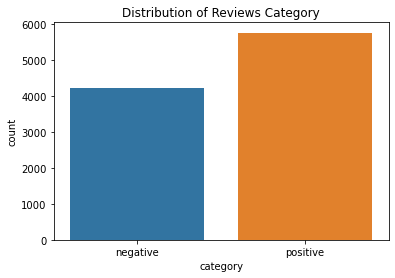

In [10]:
kindle_df['category']=kindle_df.apply(lambda row:RatingCat(row),axis=1)
sns.countplot(kindle_df['category']).set_title("Distribution of Reviews Category")   #distribution of the reviews
kindle_df

# Train Test Split

In [27]:
STOPWORDS=set(stopwords.words("english")) #stopwords are the most common unnecessary words. eg is, he, that, etc.

def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii') # A function to remove emojis from the reviews

In [21]:
import nltk

In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/indupriyakompi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
!pip install sklearn

In [28]:
from nltk.corpus import stopwords
from nltk import PorterStemmer as stemmer
from bs4 import BeautifulSoup 

import string
import re
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

ModuleNotFoundError: No module named 'sklearn.feature_extraction.stop_words'

In [29]:
def clean_text(text):
    ps=stemmer()
    
    text=deEmojify(text) # remove emojis
    text_cleaned="".join([x for x in text if x not in string.punctuation]) # remove punctuation
    
    text_cleaned=re.sub(' +', ' ', text_cleaned) # remove extra white spaces
    text_cleaned=text_cleaned.lower() # converting to lowercase
    tokens=text_cleaned.split(" ")
    tokens=[token for token in tokens if token not in STOPWORDS] # Taking only those words which are not stopwords
    text_cleaned=" ".join([ps.stem(token) for token in tokens])
    
    return text_cleaned
kindle_df['cleaned_product_review']=kindle_df['product_review'].apply(lambda x:clean_text(x))
kindle_df

,review_title,product_review,product_rating,reviewer,category,cleaned_product_review
0,"Works fine, replaces a Gen 3.",If you own an earlier Paperwhite and it's st...,3.0,E. Hinrichsen II,negative,earlier paperwhit still function compel reaso...
1,Pinhole Bright Spots and Other Issues,"Updated Review on Oct 6, 2019:",4.0,Sir Mike,positive,updat review oct 6 2019
2,Battery life is awful,"I love Kindle, have always had one since the...",3.0,Ship210,negative,love kindl alway one sinc first edit third pa...
3,A Review From 2 Perspectives,I feel I need to approach this review from 2...,5.0,Rustic,positive,feel need approach review 2 perspect
4,It’s waterproof. Everything else is worse.,It’s infuriating that Amazon went to market ...,1.0,D. Bier,negative,infuri amazon went market machin upgrad prior...
...,...,...,...,...,...,...
9996,My first Kindle - Love it!,"I've never used a Kindle, or any e-reader befo...",5.0,AngieF,positive,ive never use kindl eread wasnt sure much woul...
9997,Amazon con job,"Can no longer ""Remove this title"" from my Kind...",3.0,thom flora,negative,longer remov titl kindl content devic bought v...
9998,A necessary evil...,I bought the Kindle Paperwhite so I could down...,4.0,Sylvia,positive,bought kindl paperwhit could download book lib...
9999,New and imporved,Smaller and lighter (green is the new one and ...,5.0,kattface6,positive,smaller lighter green new one white old size s...


In [30]:
# Split data into training set and validation
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(kindle_df['cleaned_product_review'], kindle_df['category'], \
                                                    test_size=0.1, random_state=0)

print('Load %d training examples and %d validation examples. \n' %(X_train.shape[0],X_test.shape[0]))
print('Show a review in the training set : \n', X_train.iloc[10])
X_train,y_train


Load 9000 training examples and 1001 validation examples. 

Show a review in the training set : 
  love read kindl hard go back paper book second paperwhit one end bottom lake wait week recov bought new one cant without


(2087     wait long time buy kindl paperwhit read book ...
 8653    big fan kindl long time final decid upgrad new...
 2363     receiv kindl gift gener good perform well how...
 3925     like reada lot 4th kindl tri fire batteri lif...
 3471     love kindl paperwhit distract finish novel bo...
                               ...                        
 9225    use read ipad use kindl app fine develop carpa...
 4859     research eread lot id never own one decid tak...
 3264     ive own kindl time far worst upgrad thing pap...
 9845    sensit screen need return home screen format l...
 2732     receiv gift husband devic fine littl clunki u...
 Name: cleaned_product_review, Length: 9000, dtype: object,
 2087    positive
 8653    negative
 2363    negative
 3925    positive
 3471    positive
           ...   
 9225    positive
 4859    positive
 3264    negative
 9845    positive
 2732    negative
 Name: category, Length: 9000, dtype: object)

In [31]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
countVect = CountVectorizer() 

In [32]:
X_train_countVect = countVect.fit_transform(X_train)
print("Number of features : %d \n" %len(countVect.get_feature_names())) #6378 
print("Show some feature names : \n", countVect.get_feature_names()[::1000])

Number of features : 8014 

Show some feature names : 
 ['000', 'battl', 'decid', 'fuch', 'kummaran', 'outi', 'riceinaziplock', 'temperatur', 'yup']


In [33]:
def modelEvaluation(predictions):
    '''
    Print model evaluation to predicted result 
    '''
    print ("\nAccuracy on training set: {:.4f}".format(mnb.score(X_train_countVect, y_train)))
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test, predictions)))
    print ("\nClassification report : \n", metrics.classification_report(y_test, predictions))
    print ("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test, predictions))

In [34]:
# Train MultinomialNB classifier
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train_countVect, y_train)

MultinomialNB()

In [35]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
predictions = mnb.predict(countVect.transform(X_test))
modelEvaluation(predictions)


Accuracy on training set: 0.8543

Accuracy on validation set: 0.8142

Classification report : 
               precision    recall  f1-score   support

    negative       0.82      0.74      0.78       439
    positive       0.81      0.87      0.84       562

    accuracy                           0.81      1001
   macro avg       0.81      0.81      0.81      1001
weighted avg       0.81      0.81      0.81      1001


Confusion Matrix : 
 [[325 114]
 [ 72 490]]


In [36]:
from sklearn.svm import SVC, LinearSVC, NuSVC

In [37]:
from sklearn import svm
svc = svm.SVC()

In [38]:
svc.fit(X_train_countVect, y_train)

SVC()

In [39]:
predictions = svc.predict(countVect.transform(X_test))
modelEvaluation(predictions)


Accuracy on training set: 0.8543

Accuracy on validation set: 0.8981

Classification report : 
               precision    recall  f1-score   support

    negative       0.93      0.83      0.88       439
    positive       0.88      0.95      0.91       562

    accuracy                           0.90      1001
   macro avg       0.90      0.89      0.90      1001
weighted avg       0.90      0.90      0.90      1001


Confusion Matrix : 
 [[365  74]
 [ 28 534]]


In [40]:
test = "i like kindle"
print(mnb.predict(countVect.transform([test]))[0])

print(svc.predict(countVect.transform([test]))[0])


positive
positive


In [41]:
test = "this sucks"
print(mnb.predict(countVect.transform([test]))[0])

print(svc.predict(countVect.transform([test]))[0])


positive
negative


In [42]:
test = "battery is awful"
print(mnb.predict(countVect.transform([test]))[0])

print(svc.predict(countVect.transform([test]))[0])


positive
negative


In [43]:
test = "worst ever"
print(mnb.predict(countVect.transform([test]))[0])

print(svc.predict(countVect.transform([test]))[0])


negative
negative


# BERT

In [44]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures

In [45]:
model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased")
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertForSequenceClassification: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['dropout_37', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [46]:
import tensorflow as tf

In [47]:
# import tensorflow as tf
train = pd.DataFrame([X_train,y_train]).T
train.head()

,cleaned_product_review,category
2087,wait long time buy kindl paperwhit read book ...,positive
8653,big fan kindl long time final decid upgrad new...,negative
2363,receiv kindl gift gener good perform well how...,negative
3925,like reada lot 4th kindl tri fire batteri lif...,positive
3471,love kindl paperwhit distract finish novel bo...,positive


In [48]:
test = pd.DataFrame([X_test,y_test]).T
test.head()

,cleaned_product_review,category
9395,purchas primarili check recent publish book ki...,positive
898,realli like paperwhit older gener one love bi...,positive
2398,amazon offer persuas deal turn previou kindl ...,negative
4737,order one broken send anoth slow unrespons co...,negative
2343,year avoid digit book gave bought one dont kn...,positive


In [49]:
train.columns

Index(['cleaned_product_review', 'category'], dtype='object')

In [50]:
InputExample(guid=None,
             text_a = "Hello, world",
             text_b = None,
             label = 1)

InputExample(guid=None, text_a='Hello, world', text_b=None, label=1)

In [51]:
def convert_data_to_examples(train, test, cleaned_product_review, category): 
  train_InputExamples = train.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[cleaned_product_review], 
                                                          text_b = None,
                                                          label = x[category]), axis = 1)

  validation_InputExamples = test.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[cleaned_product_review], 
                                                          text_b = None,
                                                          label = x[category]), axis = 1)
  
  return train_InputExamples, validation_InputExamples

  train_InputExamples, validation_InputExamples = convert_data_to_examples(train, 
                                                                           test, 
                                                                           'cleaned_product_review', 
                                                                           'category')
  
def convert_examples_to_tf_dataset(examples, tokenizer, max_length=128):
    features = [] # -> will hold InputFeatures to be converted later

    for e in examples:
        # Documentation is really strong for this method, so please take a look at it
        input_dict = tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length, # truncates if len(s) > max_length
            return_token_type_ids=True,
            return_attention_mask=True,
            pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
            truncation=True
        )

        input_ids, token_type_ids, attention_mask = (input_dict["input_ids"],
            input_dict["token_type_ids"], input_dict['attention_mask'])

        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, label=e.label
            )
        )

    def gen():
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                    "token_type_ids": f.token_type_ids,
                },
                f.label,
            )

    return tf.data.Dataset.from_generator(
        gen,
        ({"input_ids": tf.int32, "attention_mask": tf.int32, "token_type_ids": tf.int32}, tf.int64),
        (
            {
                "input_ids": tf.TensorShape([None]),
                "attention_mask": tf.TensorShape([None]),
                "token_type_ids": tf.TensorShape([None]),
            },
            tf.TensorShape([]),
        ),
    )


product_review = 'cleaned_product_review'
category = 'category'

In [ ]:
train_InputExamples, validation_InputExamples = convert_data_to_examples(train, test, product_review, category)

train_data = convert_examples_to_tf_dataset(list(train_InputExamples), tokenizer)
train_data = train_data.shuffle(100).batch(32).repeat(2)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), tokenizer)
validation_data = validation_data.batch(32)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])
model.fit(train_data, epochs=2, validation_data=validation_data)

In [ ]:
pred_sentences = ['This is an awesome product. Portable and good gift',
                  'One of the worst products of all time. I cannot believe I wasted my money on this']

In [ ]:
tf_batch = tokenizer(pred_sentences, max_length=128, padding=True, truncation=True, return_tensors='tf')
tf_outputs = model(tf_batch)
tf_predictions = tf.nn.softmax(tf_outputs[0], axis=-1)
labels = ['Negative','Positive']
label = tf.argmax(tf_predictions, axis=1)
label = label.numpy()
for i in range(len(pred_sentences)):
    print(pred_sentences[i], ": \n", labels[label[i]])

# GFG

In [ ]:
# Creating dataframe according to BERT data requirements by adding the required columns in the right order
df_bert = pd.DataFrame({
    ‘id’:range(len(train_data)),
    ‘label’:train_data[0],
    ‘alpha’:[‘a’]*train_data.shape[0],
    ‘text’: train_data[1].replace(r’\n’, ‘ ‘, regex=True)
})
df_bert.head()